<a href="https://colab.research.google.com/github/CMAZ83/pgd-aiml/blob/main/ML_Telecom_churn_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!wget https://www.dropbox.com/s/55ar5v2hnvy8cx3/datasets-255093-535845-churn-bigml-80.csv


--2022-01-15 19:08:19--  https://www.dropbox.com/s/55ar5v2hnvy8cx3/datasets-255093-535845-churn-bigml-80.csv
Resolving www.dropbox.com (www.dropbox.com)... 162.125.5.18, 2620:100:601d:18::a27d:512
Connecting to www.dropbox.com (www.dropbox.com)|162.125.5.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/55ar5v2hnvy8cx3/datasets-255093-535845-churn-bigml-80.csv [following]
--2022-01-15 19:08:19--  https://www.dropbox.com/s/raw/55ar5v2hnvy8cx3/datasets-255093-535845-churn-bigml-80.csv
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uccbd1db14f495fc2b750d8dd115.dl.dropboxusercontent.com/cd/0/inline/Bd16Tx4qMj23Ct_T0HI56IxhVIQvVsAspJP8XRjfzonyNAckMprfj4_A81js-gawyFdiO7GWr3deLpf8LwjrlGxcxAj4q4_X_us-KK76keDanX2cBB_JvnD9PVnQA1J1LpkUSHEfFR-VbrEalV4T2gcf/file# [following]
--2022-01-15 19:08:20--  https://uccbd1db14f495fc2b750d8dd115.dl.dropboxusercontent.com/cd/0/inline/Bd1

In [2]:
import pandas as pd
df=pd.read_csv('datasets-255093-535845-churn-bigml-80.csv')
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [3]:
df.shape

(2666, 20)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2666 entries, 0 to 2665
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   2666 non-null   object 
 1   Account length          2666 non-null   int64  
 2   Area code               2666 non-null   int64  
 3   International plan      2666 non-null   object 
 4   Voice mail plan         2666 non-null   object 
 5   Number vmail messages   2666 non-null   int64  
 6   Total day minutes       2666 non-null   float64
 7   Total day calls         2666 non-null   int64  
 8   Total day charge        2666 non-null   float64
 9   Total eve minutes       2666 non-null   float64
 10  Total eve calls         2666 non-null   int64  
 11  Total eve charge        2666 non-null   float64
 12  Total night minutes     2666 non-null   float64
 13  Total night calls       2666 non-null   int64  
 14  Total night charge      2666 non-null   

In [5]:
print(len(df['State'].unique()))

51


In [6]:
print(df['International plan'].unique())

['No' 'Yes']


In [7]:
print(df['Voice mail plan'].unique())

['Yes' 'No']


In [8]:
print(df['Churn'].unique())

[False  True]


In [9]:
df.replace({'International plan':{'No':0, 'Yes':1},'Voice mail plan':{'No':0, 'Yes':1}, 'Churn': {False:0, True:1}}, inplace=True)

In [10]:
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,OH,107,415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,NJ,137,415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,OH,84,408,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,OK,75,415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


In [11]:
import numpy as np
state_churn=df.groupby(['State'])['Churn'].agg('mean')
state_churn

State
AK    0.069767
AL    0.106061
AR    0.234043
AZ    0.066667
CA    0.208333
CO    0.118644
CT    0.186441
DC    0.111111
DE    0.156863
FL    0.129630
GA    0.163265
HI    0.045455
IA    0.078947
ID    0.089286
IL    0.088889
IN    0.111111
KS    0.192308
KY    0.139535
LA    0.085714
MA    0.153846
MD    0.233333
ME    0.224490
MI    0.224138
MN    0.185714
MO    0.098039
MS    0.229167
MT    0.188679
NC    0.160714
ND    0.090909
NE    0.088889
NH    0.209302
NJ    0.280000
NM    0.090909
NV    0.213115
NY    0.176471
OH    0.151515
OK    0.134615
OR    0.112903
PA    0.222222
RI    0.062500
SC    0.224490
SD    0.122449
TN    0.121951
TX    0.290909
UT    0.133333
VA    0.059701
VT    0.105263
WA    0.208333
WI    0.065574
WV    0.079545
WY    0.121212
Name: Churn, dtype: float64

In [12]:
d=dict()
for i in df.State.unique():
  if i not in d:
    d[i]=state_churn[i]
df['state_churn']=df['State'].map(d)  


In [13]:
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn,state_churn
0,KS,128,415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0,0.192308
1,OH,107,415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0,0.151515
2,NJ,137,415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0,0.280000
3,OH,84,408,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0,0.151515
4,OK,75,415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0,0.134615


In [14]:
df['avg_day_call_dur']=df['Total day minutes']/df['Total day calls']
df.drop(columns=['Total day minutes','Total day calls'],axis=1, inplace=True)

In [15]:
df['avg_night_call_dur']=df['Total night minutes']/df['Total night calls']
df.drop(columns=['Total night minutes', 'Total night calls'], axis = 1, inplace=True )

In [16]:
df['avg_eve_call_dur']=df['Total eve minutes']/df['Total eve calls']
df.drop(columns=['Total eve minutes', 'Total eve calls'], axis=1, inplace=True)

In [17]:
df.dropna(inplace=True)
df.isnull().sum()

State                     0
Account length            0
Area code                 0
International plan        0
Voice mail plan           0
Number vmail messages     0
Total day charge          0
Total eve charge          0
Total night charge        0
Total intl minutes        0
Total intl calls          0
Total intl charge         0
Customer service calls    0
Churn                     0
state_churn               0
avg_day_call_dur          0
avg_night_call_dur        0
avg_eve_call_dur          0
dtype: int64

In [18]:
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day charge,Total eve charge,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn,state_churn,avg_day_call_dur,avg_night_call_dur,avg_eve_call_dur
0,KS,128,415,0,1,25,45.07,16.78,11.01,10.0,3,2.70,1,0,0.192308,2.410000,2.689011,1.993939
1,OH,107,415,0,1,26,27.47,16.62,11.45,13.7,3,3.70,1,0,0.151515,1.313821,2.469903,1.898058
2,NJ,137,415,0,0,0,41.38,10.30,7.32,12.2,5,3.29,0,0,0.280000,2.135088,1.563462,1.101818
3,OH,84,408,1,0,0,50.90,5.26,8.86,6.6,7,1.78,2,0,0.151515,4.216901,2.212360,0.703409
4,OK,75,415,1,0,0,28.34,12.61,8.41,10.1,3,2.73,3,0,0.134615,1.475221,1.544628,1.215574


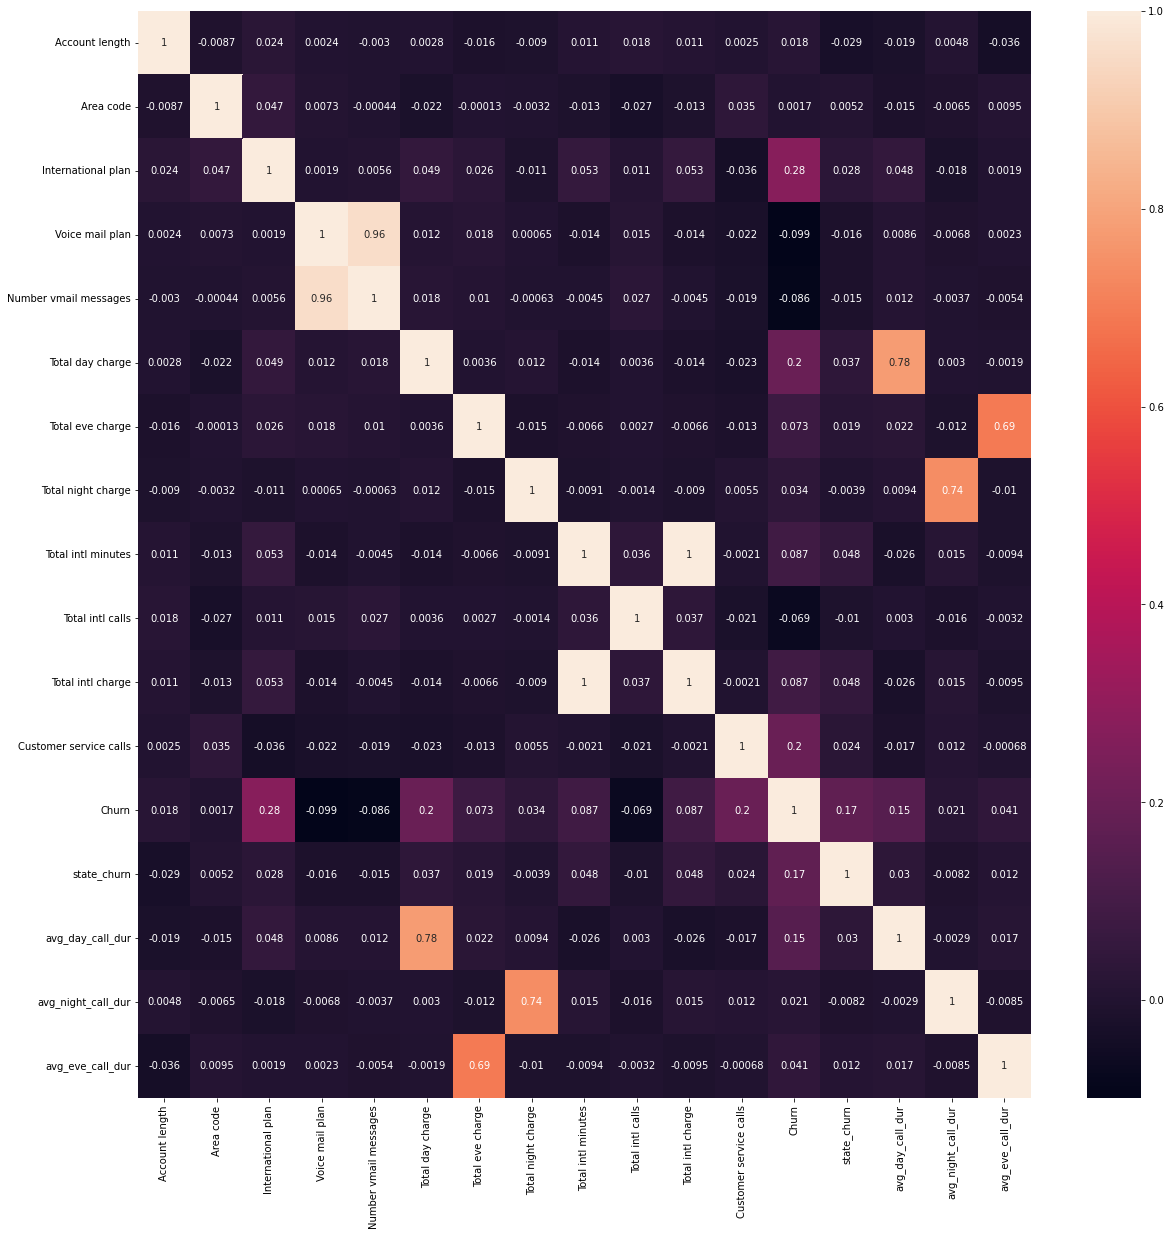

In [19]:
#plotting correlation
import seaborn as sns
from matplotlib import pyplot as plt
fig,ax=plt.subplots(figsize=(20,20))
correlation=df.corr()
sns.heatmap(correlation, annot=True, ax=ax)

In [20]:
from sklearn.model_selection import train_test_split
X=df.drop(columns=['State', 'Churn'], axis=1)
Y=df['Churn']
X_train, X_test, Y_train, Y_test=train_test_split(X,Y, test_size=0.20, random_state=7)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(2130, 16)
(533, 16)
(2130,)
(533,)


In [21]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold
cv=StratifiedKFold(10)
model_rf=RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=7)
model_dt=DecisionTreeClassifier()
rf_score=cross_val_score(model_rf, X_train, Y_train, cv=cv)
print(f'score of random forest classifier is: {rf_score.mean()}')
dt_score=cross_val_score(model_dt, X_train, Y_train, cv=cv)
print(f'score of the decision tree classifier is: {dt_score.mean()}')

score of random forest classifier is: 0.9427230046948356
score of the decision tree classifier is: 0.8957746478873239


In [22]:
from sklearn.model_selection import GridSearchCV
model_params = {'n_estimators': range(20,100,20), 'max_depth': range(3,15), 'max_features': range(4,17)}
model_cv = GridSearchCV(model_rf, model_params, cv=5, n_jobs=1, verbose = True, return_train_score=True, scoring='recall')
model_cv.fit(X_train, Y_train)

Fitting 5 folds for each of 624 candidates, totalling 3120 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=-1, random_state=7),
             n_jobs=1,
             param_grid={'max_depth': range(3, 15),
                         'max_features': range(4, 17),
                         'n_estimators': range(20, 100, 20)},
             return_train_score=True, scoring='recall', verbose=True)

In [23]:
model_cv.best_params_

{'max_depth': 14, 'max_features': 13, 'n_estimators': 60}

In [24]:
model_cv.best_score_

0.7484848484848484

In [25]:
model_cv.best_estimator_

RandomForestClassifier(max_depth=14, max_features=13, n_estimators=60,
                       n_jobs=-1, random_state=7)

In [26]:
final_model=model_cv.best_estimator_
final_model.fit(X_train, Y_train)
Y_pred=final_model.predict(X_test)

In [27]:
from sklearn.metrics import accuracy_score, classification_report
print(f"Accuracy score on test data is {accuracy_score(Y_test, Y_pred)}")
print(classification_report(Y_test, Y_pred))

Accuracy score on test data is 0.9568480300187617
              precision    recall  f1-score   support

           0       0.96      0.99      0.98       472
           1       0.93      0.67      0.78        61

    accuracy                           0.96       533
   macro avg       0.95      0.83      0.88       533
weighted avg       0.96      0.96      0.95       533



In [28]:
from numpy import argsort
imp=final_model.feature_importances_
x=argsort(imp)[::-1]
col_names=list(df.columns)
col_names.remove('State')
col_names.remove('Churn')
top_features=list()
for i in x[:13]:
  print(col_names[i])
  top_features.append(col_names[i])

Total day charge
Customer service calls
Total eve charge
International plan
Total intl calls
Total intl minutes
avg_eve_call_dur
Total intl charge
avg_day_call_dur
Total night charge
avg_night_call_dur
Number vmail messages
state_churn


In [29]:
X_new=df[top_features]
X_new

,Total day charge,Customer service calls,Total eve charge,International plan,Total intl calls,Total intl minutes,avg_eve_call_dur,Total intl charge,avg_day_call_dur,Total night charge,avg_night_call_dur,Number vmail messages,state_churn
0,45.07,1,16.78,0,3,10.0,1.993939,2.70,2.410000,11.01,2.689011,25,0.192308
1,27.47,1,16.62,0,3,13.7,1.898058,3.70,1.313821,11.45,2.469903,26,0.151515
2,41.38,0,10.30,0,5,12.2,1.101818,3.29,2.135088,7.32,1.563462,0,0.280000
3,50.90,2,5.26,1,7,6.6,0.703409,1.78,4.216901,8.86,2.212360,0,0.151515
4,28.34,3,12.61,1,3,10.1,1.215574,2.73,1.475221,8.41,1.544628,0,0.134615
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2661,22.90,2,16.12,0,5,11.8,2.789706,3.19,1.374490,9.96,1.729688,0,0.224490
2662,26.55,2,18.32,0,6,9.9,1.710317,2.67,2.028571,12.56,3.362651,36,0.066667
2663,39.29,3,13.04,0,4,9.6,2.789091,2.59,4.054386,8.61,1.555285,0,0.079545
2664,30.74,2,24.55,0,6,14.1,4.979310,3.81,1.658716,8.64,2.108791,0,0.062500


In [31]:
new_model=model_cv.best_estimator_
score=cross_val_score(new_model, X_new, Y, cv=5)
print(f'score of random forest classifier: {score.mean()}')

score of random forest classifier: 0.9463069023402785
